In [14]:
# usual imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib notebook

from sklearn.cross_validation import train_test_split

# Each is a different implemntation of a text transform tool: Bag of Words & Tfidf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### read yelp_labelled data and split it using \t

In [15]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/yelp_labelled.txt"
Yelp_Data = pd.read_csv(url, sep = '\t', names = ['text','sentiment'])
Yelp_Data.head()

,text,sentiment
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


#### Put your yelp data into a dataframe and drop na values.

In [16]:
Yelp_Data.dropna(inplace = True)
Yelp_Data.head()

,text,sentiment
0,Wow... Loved this place.,1.0
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0
10,Stopped by during the late May bank holiday of...,1.0
11,The selection on the menu was great and so wer...,1.0


#### Using Pipeline, RandomForestClasifier, and GridSearchCV, play with min_df and max_df on your yelp data. Split your data to test and training. You can use either of CountVetorizer or TfidfVectorizer

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report


In [19]:
count_vect = CountVectorizer(stop_words = 'english')
bag_o_words = count_vect.fit_transform(Yelp_Data['text'])
bag_o_words.shape

(1000, 1820)

In [20]:
count_vect.get_feature_names()

[u'00',
 u'10',
 u'100',
 u'11',
 u'12',
 u'15',
 u'17',
 u'1979',
 u'20',
 u'2007',
 u'23',
 u'30',
 u'30s',
 u'35',
 u'40',
 u'40min',
 u'45',
 u'4ths',
 u'5lb',
 u'70',
 u'85',
 u'90',
 u'99',
 u'absolute',
 u'absolutely',
 u'absolutley',
 u'accident',
 u'accommodations',
 u'accomodate',
 u'accordingly',
 u'accountant',
 u'ache',
 u'acknowledged',
 u'actual',
 u'actually',
 u'added',
 u'affordable',
 u'afternoon',
 u'ago',
 u'ahead',
 u'airline',
 u'airport',
 u'ala',
 u'albondigas',
 u'allergy',
 u'almonds',
 u'amazing',
 u'ambiance',
 u'ambience',
 u'ample',
 u'andddd',
 u'angry',
 u'annoying',
 u'anticipated',
 u'anymore',
 u'anytime',
 u'anyways',
 u'apart',
 u'apologize',
 u'apology',
 u'app',
 u'appalling',
 u'apparently',
 u'appealing',
 u'appetite',
 u'appetizer',
 u'appetizers',
 u'apple',
 u'approval',
 u'area',
 u'aren',
 u'arepas',
 u'aria',
 u'array',
 u'arrived',
 u'arrives',
 u'arriving',
 u'article',
 u'ask',
 u'asked',
 u'asking',
 u'assure',
 u'ate',
 u'atmosphere'

<IPython.core.display.Javascript object>


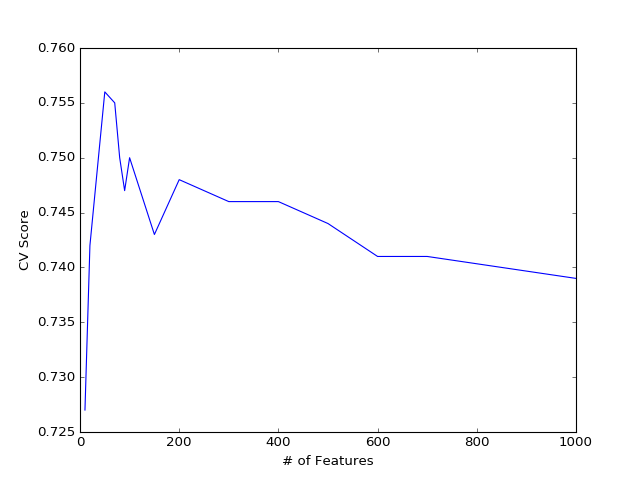

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
X = bag_o_words
y = Yelp_Data['sentiment']
Features = [10, 20, 50, 70, 80, 90, 100, 150, 200, 300, 400, 500, 600, 700, 1000]
Scores_cv = []
for i in Features:
    RF = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           n_jobs = -1)

    RF.fit(X, y)
    Scores_cv.append(cross_val_score(RF, X, y, cv=10, scoring = 'accuracy', n_jobs = -1).mean())

plt.plot(Features, Scores_cv)
plt.xlabel("# of Features")
plt.ylabel("CV Score")
plt.show()

#### How much test error do you get based on the optimizer you found above?

#### Look over few (first 5) X_test instances and compare the category predicted for the observation and the actual review sentence. 

In [ ]:
for i in range(5):
    print(fit_grid.predict(X_test)[i])
    print(X_test.values[i])

## Bonus Quetions: Can you find the test instances that are correctly classified and thos that are misclassified?

In [ ]:
#Misclassified instances



In [ ]:
#Correctly Classified instances
